<a href="https://colab.research.google.com/github/rribas/artigo_fuzzy_icms/blob/main/Aplica%C3%A7%C3%A3o_da_L%C3%B3gica_Fuzzy_na_Detec%C3%A7%C3%A3o_de_Fraude_de_ICMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Instalando dependências**

In [45]:
!pip install sklearn
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Importando dependências**

In [46]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
import pandas as pd
import hashlib
import datetime

# **Variáveis do Problema**


**Variáveis de Entrada**

1- Idade da empresa em meses

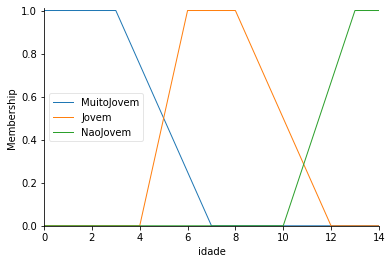

In [47]:
idade = ctrl.Antecedent(np.arange(0, 15, 1), 'idade')
idade['MuitoJovem'] = fuzz.trapmf(idade.universe, [0, 0, 3, 7])
idade['Jovem'] = fuzz.trapmf(idade.universe, [4, 6, 8, 12])
idade['NaoJovem'] = fuzz.trapmf(idade.universe, [10, 13, 15, 150])

idade.view()

2- Fator Saída x Entrada: valores de emissão de notas fiscais de saída em relação às de entrada por mês

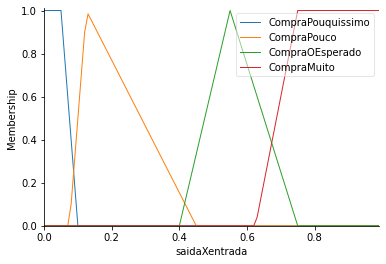

In [48]:
saidaXentrada = ctrl.Antecedent(np.arange(0, 1, 0.01), 'saidaXentrada')
saidaXentrada['CompraPouquissimo'] = fuzz.trapmf(saidaXentrada.universe, [0.0, 0.0, 0.05, 0.10])
saidaXentrada['CompraPouco'] = fuzz.trimf(saidaXentrada.universe, [0.075, 0.125, 0.45])
saidaXentrada['CompraOEsperado'] = fuzz.trimf(saidaXentrada.universe, [0.40, 0.55, 0.75])
saidaXentrada['CompraMuito'] = fuzz.trapmf(saidaXentrada.universe, [0.625, 0.75, 1, 10])

saidaXentrada.view()

3- Fator Saída X Arrecadação: valores de emissão de notas fiscais e arrecadação declarada

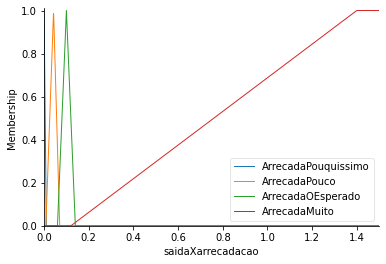

In [49]:
saidaXarrecadacao = ctrl.Antecedent(np.arange(0, 1.50, 0.001), 'saidaXarrecadacao')
saidaXarrecadacao['ArrecadaPouquissimo'] = fuzz.trimf(saidaXarrecadacao.universe, [0, 0.0, 0.01])
saidaXarrecadacao['ArrecadaPouco'] = fuzz.trimf(saidaXarrecadacao.universe, [0.008, 0.0425, 0.070])
saidaXarrecadacao['ArrecadaOEsperado'] = fuzz.trimf(saidaXarrecadacao.universe, [0.060, 0.100, 0.140])
saidaXarrecadacao['ArrecadaMuito'] = fuzz.trapmf(saidaXarrecadacao.universe, [0.120, 1.40, 1.50, 14])

saidaXarrecadacao.view()

# **Variáveis de Saída**

Grau de Fraudadora

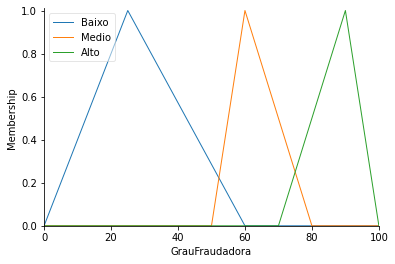

In [50]:
noteira = ctrl.Consequent(np.arange(0, 101, 1), 'GrauFraudadora')
noteira['Baixo'] = fuzz.trimf(noteira.universe, [0, 25, 60])
noteira['Medio'] = fuzz.trimf(noteira.universe, [50, 60, 80])
noteira['Alto'] = fuzz.trimf(noteira.universe, [70, 90, 100])
noteira.view()

# **Regras**

In [51]:
rules = []

Muito Jovem

In [52]:
rules.append(
    ctrl.Rule(idade['MuitoJovem'] & saidaXentrada['CompraPouquissimo'] & saidaXarrecadacao['ArrecadaPouquissimo'],
              noteira['Alto']))
rules.append(ctrl.Rule(idade['MuitoJovem'] & saidaXentrada['CompraPouquissimo'] & saidaXarrecadacao['ArrecadaPouco'],
                       noteira['Alto']))
rules.append(
    ctrl.Rule(idade['MuitoJovem'] & saidaXentrada['CompraPouquissimo'] & saidaXarrecadacao['ArrecadaOEsperado'],
              noteira['Medio']))
rules.append(ctrl.Rule(idade['MuitoJovem'] & saidaXentrada['CompraPouquissimo'] & saidaXarrecadacao['ArrecadaMuito'],
                       noteira['Baixo']))

rules.append(ctrl.Rule(idade['MuitoJovem'] & saidaXentrada['CompraPouco'] & saidaXarrecadacao['ArrecadaPouquissimo'],
                       noteira['Alto']))
rules.append(ctrl.Rule(idade['MuitoJovem'] & saidaXentrada['CompraPouco'] & saidaXarrecadacao['ArrecadaPouco'],
                       noteira['Alto']))
rules.append(ctrl.Rule(idade['MuitoJovem'] & saidaXentrada['CompraPouco'] & saidaXarrecadacao['ArrecadaOEsperado'],
                       noteira['Medio']))
rules.append(ctrl.Rule(idade['MuitoJovem'] & saidaXentrada['CompraPouco'] & saidaXarrecadacao['ArrecadaMuito'],
                       noteira['Baixo']))

rules.append(
    ctrl.Rule(idade['MuitoJovem'] & saidaXentrada['CompraOEsperado'] & saidaXarrecadacao['ArrecadaPouquissimo'],
              noteira['Alto']))
rules.append(ctrl.Rule(idade['MuitoJovem'] & saidaXentrada['CompraOEsperado'] & saidaXarrecadacao['ArrecadaPouco'],
                       noteira['Alto']))
rules.append(ctrl.Rule(idade['MuitoJovem'] & saidaXentrada['CompraOEsperado'] & saidaXarrecadacao['ArrecadaOEsperado'],
                       noteira['Medio']))
rules.append(ctrl.Rule(idade['MuitoJovem'] & saidaXentrada['CompraOEsperado'] & saidaXarrecadacao['ArrecadaMuito'],
                       noteira['Baixo']))

rules.append(ctrl.Rule(idade['MuitoJovem'] & saidaXentrada['CompraMuito'] & saidaXarrecadacao['ArrecadaPouquissimo'],
                       noteira['Alto']))
rules.append(ctrl.Rule(idade['MuitoJovem'] & saidaXentrada['CompraMuito'] & saidaXarrecadacao['ArrecadaPouco'],
                       noteira['Alto']))
rules.append(ctrl.Rule(idade['MuitoJovem'] & saidaXentrada['CompraMuito'] & saidaXarrecadacao['ArrecadaOEsperado'],
                       noteira['Medio']))
rules.append(ctrl.Rule(idade['MuitoJovem'] & saidaXentrada['CompraMuito'] & saidaXarrecadacao['ArrecadaMuito'],
                       noteira['Baixo']))



Jovem

In [53]:
rules.append(ctrl.Rule(idade['Jovem'] & saidaXentrada['CompraPouquissimo'] & saidaXarrecadacao['ArrecadaPouquissimo'],
                       noteira['Alto']))
rules.append(ctrl.Rule(idade['Jovem'] & saidaXentrada['CompraPouquissimo'] & saidaXarrecadacao['ArrecadaPouco'],
                       noteira['Alto']))
rules.append(ctrl.Rule(idade['Jovem'] & saidaXentrada['CompraPouquissimo'] & saidaXarrecadacao['ArrecadaOEsperado'],
                       noteira['Medio']))
rules.append(ctrl.Rule(idade['Jovem'] & saidaXentrada['CompraPouquissimo'] & saidaXarrecadacao['ArrecadaMuito'],
                       noteira['Baixo']))

rules.append(ctrl.Rule(idade['Jovem'] & saidaXentrada['CompraPouco'] & saidaXarrecadacao['ArrecadaPouquissimo'],
                       noteira['Alto']))
rules.append(ctrl.Rule(idade['Jovem'] & saidaXentrada['CompraPouco'] & saidaXarrecadacao['ArrecadaPouco'],
                       noteira['Alto']))
rules.append(ctrl.Rule(idade['Jovem'] & saidaXentrada['CompraPouco'] & saidaXarrecadacao['ArrecadaOEsperado'],
                       noteira['Medio']))
rules.append(ctrl.Rule(idade['Jovem'] & saidaXentrada['CompraPouco'] & saidaXarrecadacao['ArrecadaMuito'],
                       noteira['Baixo']))

rules.append(ctrl.Rule(idade['Jovem'] & saidaXentrada['CompraOEsperado'] & saidaXarrecadacao['ArrecadaPouquissimo'],
                       noteira['Alto']))
rules.append(ctrl.Rule(idade['Jovem'] & saidaXentrada['CompraOEsperado'] & saidaXarrecadacao['ArrecadaPouco'],
                       noteira['Alto']))
rules.append(ctrl.Rule(idade['Jovem'] & saidaXentrada['CompraOEsperado'] & saidaXarrecadacao['ArrecadaOEsperado'],
                       noteira['Medio']))
rules.append(ctrl.Rule(idade['Jovem'] & saidaXentrada['CompraOEsperado'] & saidaXarrecadacao['ArrecadaMuito'],
                       noteira['Baixo']))

rules.append(ctrl.Rule(idade['Jovem'] & saidaXentrada['CompraMuito'] & saidaXarrecadacao['ArrecadaPouquissimo'],
                       noteira['Alto']))
rules.append(ctrl.Rule(idade['Jovem'] & saidaXentrada['CompraMuito'] & saidaXarrecadacao['ArrecadaPouco'],
                       noteira['Alto']))
rules.append(ctrl.Rule(idade['Jovem'] & saidaXentrada['CompraMuito'] & saidaXarrecadacao['ArrecadaOEsperado'],
                       noteira['Medio']))
rules.append(ctrl.Rule(idade['Jovem'] & saidaXentrada['CompraMuito'] & saidaXarrecadacao['ArrecadaMuito'],
                       noteira['Baixo']))


Não Jovem

In [54]:
rules.append(
    ctrl.Rule(idade['NaoJovem'] & saidaXentrada['CompraPouquissimo'] & saidaXarrecadacao['ArrecadaPouquissimo'],
              noteira['Alto']))
rules.append(ctrl.Rule(idade['NaoJovem'] & saidaXentrada['CompraPouquissimo'] & saidaXarrecadacao['ArrecadaPouco'],
                       noteira['Alto']))
rules.append(ctrl.Rule(idade['NaoJovem'] & saidaXentrada['CompraPouquissimo'] & saidaXarrecadacao['ArrecadaOEsperado'],
                       noteira['Medio']))
rules.append(ctrl.Rule(idade['NaoJovem'] & saidaXentrada['CompraPouquissimo'] & saidaXarrecadacao['ArrecadaMuito'],
                       noteira['Baixo']))

rules.append(ctrl.Rule(idade['NaoJovem'] & saidaXentrada['CompraPouco'] & saidaXarrecadacao['ArrecadaPouquissimo'],
                       noteira['Alto']))
rules.append(ctrl.Rule(idade['NaoJovem'] & saidaXentrada['CompraPouco'] & saidaXarrecadacao['ArrecadaPouco'],
                       noteira['Alto']))
rules.append(ctrl.Rule(idade['NaoJovem'] & saidaXentrada['CompraPouco'] & saidaXarrecadacao['ArrecadaOEsperado'],
                       noteira['Medio']))
rules.append(ctrl.Rule(idade['NaoJovem'] & saidaXentrada['CompraPouco'] & saidaXarrecadacao['ArrecadaMuito'],
                       noteira['Baixo']))

rules.append(ctrl.Rule(idade['NaoJovem'] & saidaXentrada['CompraOEsperado'] & saidaXarrecadacao['ArrecadaPouquissimo'],
                       noteira['Alto']))
rules.append(ctrl.Rule(idade['NaoJovem'] & saidaXentrada['CompraOEsperado'] & saidaXarrecadacao['ArrecadaPouco'],
                       noteira['Alto']))
rules.append(ctrl.Rule(idade['NaoJovem'] & saidaXentrada['CompraOEsperado'] & saidaXarrecadacao['ArrecadaOEsperado'],
                       noteira['Medio']))
rules.append(ctrl.Rule(idade['NaoJovem'] & saidaXentrada['CompraOEsperado'] & saidaXarrecadacao['ArrecadaMuito'],
                       noteira['Baixo']))

rules.append(ctrl.Rule(idade['NaoJovem'] & saidaXentrada['CompraMuito'] & saidaXarrecadacao['ArrecadaPouquissimo'],
                       noteira['Alto']))
rules.append(ctrl.Rule(idade['NaoJovem'] & saidaXentrada['CompraMuito'] & saidaXarrecadacao['ArrecadaPouco'],
                       noteira['Alto']))
rules.append(ctrl.Rule(idade['NaoJovem'] & saidaXentrada['CompraMuito'] & saidaXarrecadacao['ArrecadaOEsperado'],
                       noteira['Medio']))
rules.append(ctrl.Rule(idade['NaoJovem'] & saidaXentrada['CompraMuito'] & saidaXarrecadacao['ArrecadaMuito'],
                       noteira['Baixo']))


Controlador Fuzzy

In [55]:
noteira_ctrl = ctrl.ControlSystem(rules)
noteira_sim = ctrl.ControlSystemSimulation(noteira_ctrl)


Carregando a massa de dados

In [56]:
url = 'https://github.com/rribas/artigo_fuzzy_icms/raw/main/empresas_suspeitas_hashid.csv'
df_suspeitas = pd.read_csv(url, sep=';', encoding='utf-8', quotechar='"', decimal=',')
df_suspeitas = df_suspeitas.dropna()

In [57]:
df_suspeitas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126555 entries, 0 to 126554
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      126555 non-null  object 
 1   IDADE   126555 non-null  float64
 2   SXE     126555 non-null  float64
 3   SXA     126555 non-null  float64
dtypes: float64(3), object(1)
memory usage: 4.8+ MB


In [58]:
df_suspeitas.head()

,ID,IDADE,SXE,SXA
0,86c3c8dae389d6a4f7d8d3fe3402bd1fc56514f5016768...,130.00,0.000,0.000
1,5636df9a1051f2b8a42554fec3d7d1876c8c9becd9e668...,248.40,0.002,0.022
2,ace094d467df6c497745bffabbfb0c31a3c3446df57dc4...,30.67,0.016,0.021
3,4f223ffbe8acf19ca6c45b05d55e196f4086b8a67da2dd...,13.70,0.000,0.001
4,da5afa3e23e104d564ec2d14f3b16d7a8e269218afd2d0...,29.43,0.003,0.000


Exemplo de teste com valores arbitrários

74.82684602474669
Pertinência a Baixo: 0.0
Pertinência a Medio: 0.2586576987626657
Pertinência a Alto: 0.2413423012373343
Classificação final: Médio; Pertinência: 0.2586576987626657


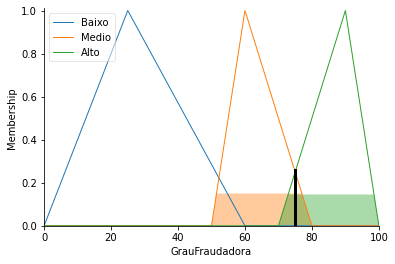

In [59]:
noteira_sim.input['idade'] = 157.34
noteira_sim.input['saidaXentrada'] = 0.157
noteira_sim.input['saidaXarrecadacao'] = 0.066
noteira_sim.compute()
crisp_value = noteira_sim.output['GrauFraudadora']
print(crisp_value)
print('Pertinência a Baixo: ' + str(fuzz.interp_membership(noteira.universe, noteira['Baixo'].mf, crisp_value)))
print('Pertinência a Medio: ' + str(fuzz.interp_membership(noteira.universe, noteira['Medio'].mf, crisp_value)))
print('Pertinência a Alto: ' + str(fuzz.interp_membership(noteira.universe, noteira['Alto'].mf, crisp_value)))

ling_value_pouco = fuzz.interp_membership(noteira.universe, noteira['Baixo'].mf, crisp_value)
ling_value_medio = fuzz.interp_membership(noteira.universe, noteira['Medio'].mf, crisp_value)
ling_value_muito = fuzz.interp_membership(noteira.universe, noteira['Alto'].mf, crisp_value)

# Aqui assumimos o maior valor da maior variável possível
# Ex: se todos ou os dois maiores valores foram iguais, isto é, tiverem a mesma pertinência em mais de um grupo, o sistema não tem como decidir, então assumimos o de maior importância

if ling_value_pouco > 0:
    ling_value = ling_value_pouco
    ling_label = 'Baixo'
if (ling_value_medio > 0 and ling_value_medio >= ling_value_pouco):
    ling_value = ling_value_medio
    ling_label = 'Médio'
if (ling_value_muito > 0 and ling_value_muito >= ling_value_medio):
    ling_value = ling_value_muito
    ling_label = 'Alto'

print(f'Classificação final: {ling_label}; Pertinência: {ling_value}')
noteira.view(sim=noteira_sim)


Submissão de todos os dados ao sistema Fuzzy

As seguintes colunas serão adicionas neste processo:


*   CRISP_VALUE
    
    - é o valor 'crisp' de saída do sistema

*   RESULT_MS_POUCO
    
    - é o grau de pertinência ao conjunto "Medio"

*   RESULT_MS_MEDIO
    
    - é o grau de pertinência ao conjunto "Medio"

*   RESULT_MS_MUITO
    
    - é o grau de pertinência ao conjunto "Alto"

*   FINAL_MS_VALUE
    
    - é o maior valor "crisp" dos graus de pertinência encontrados

*   FINAL_MS_LABEL
    
    - é a variável linguística do resultado da defuzzyficação





In [60]:
for i in df_suspeitas.index:
  noteira_sim.input['idade'] = float(df_suspeitas.at[i, 'IDADE'])
  noteira_sim.input['saidaXentrada'] = float(df_suspeitas.at[i, 'SXE'])
  noteira_sim.input['saidaXarrecadacao'] = float(df_suspeitas.at[i, 'SXA'])
  noteira_sim.compute()
  crisp_value = noteira_sim.output['GrauFraudadora']
  
  ling_value = 0
  ling_label = ""
  
  ling_value_pouco = fuzz.interp_membership(noteira.universe, noteira['Baixo'].mf, crisp_value)
  ling_value_medio = fuzz.interp_membership(noteira.universe, noteira['Medio'].mf, crisp_value)
  ling_value_muito = fuzz.interp_membership(noteira.universe, noteira['Alto'].mf, crisp_value)

  # Aqui assumimos o maior valor da maior variável possível
  # Ex: se todos ou os dois maiores valores foram iguais, isto é, tiverem a mesma pertinência em mais de um grupo, o sistema não tem como decidir, então assumimos o de maior importância

  if ling_value_pouco > 0:
      ling_value = ling_value_pouco
      ling_label = 'Baixo'
  if (ling_value_medio > 0 and ling_value_medio >= ling_value_pouco):
      ling_value = ling_value_medio
      ling_label = 'Médio'
  if (ling_value_muito > 0 and ling_value_muito >= ling_value_medio):
      ling_value = ling_value_muito
      ling_label = 'Alto'
  
  # CRIP_VALUE é o valor de saída do sistema
  df_suspeitas.at[i,'CRISP_VALUE'] = ling_value
  
  # RESULT_MS_POUCO é o grau de pertinência ao conjunto "Medio"
  df_suspeitas.at[i,'RESULT_MS_POUCO'] = ling_value_pouco

  # RESULT_MS_Medio é o grau de pertinência ao conjunto "Medio"
  df_suspeitas.at[i,'RESULT_MS_MEDIO'] = ling_value_medio

  # RESULT_MS_MUITO é o grau de pertinência ao conjunto "Alto"
  df_suspeitas.at[i,'RESULT_MS_MUITO'] = ling_value_muito

  # FINAL_MS_VALUE é o maior grau de pertinência encontrado 
  df_suspeitas.at[i,'FINAL_MS_VALUE'] = ling_value

  # FINAL_MS_LABEL é a variável linguística do resultado da defuzzyficação 
  df_suspeitas.at[i,'FINAL_MS_LABEL'] = ling_label
  

In [61]:
df_suspeitas.tail()

,ID,IDADE,SXE,SXA,CRISP_VALUE,RESULT_MS_POUCO,RESULT_MS_MEDIO,RESULT_MS_MUITO,FINAL_MS_VALUE,FINAL_MS_LABEL
126550,1f0bd2e652d7a555d3fd1436ab9f57adc82de6991a0e17...,494.53,0.0,0.00,0.833333,0.000000,0.0,0.833333,0.833333,Alto
126551,f7e0620a5ce78db7a710c33a4890c096fedd340212d50f...,7.13,0.0,29.12,0.904762,0.904762,0.0,0.000000,0.904762,Baixo
126552,82978f481186c33563fc435983f688bbd0a566e0111334...,119.87,0.0,6901.22,0.904762,0.904762,0.0,0.000000,0.904762,Baixo
126553,e02beb55598ed3dfc7771d2d452d5aba3c38136ca59b69...,103.50,0.0,27.85,0.904762,0.904762,0.0,0.000000,0.904762,Baixo
126554,197903797f27c183a9002c7fa17a7fb4a415a2f0bfeea3...,346.60,0.0,70449.29,0.904762,0.904762,0.0,0.000000,0.904762,Baixo


In [62]:
fuzzy_results = df_suspeitas['FINAL_MS_LABEL'].value_counts()
print(fuzzy_results)


Alto     84914
Baixo    33803
Médio     7838
Name: FINAL_MS_LABEL, dtype: int64


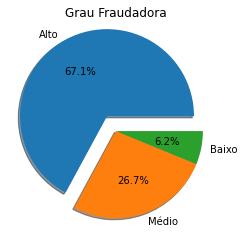

In [63]:
lbs = ['Alto','Médio','Baixo']
exp = [0.2, 0, 0]

plt.title("Grau Fraudadora")
fg = plt.pie(fuzzy_results, labels=lbs, explode=exp, autopct='%2.1f%%', shadow=True)

Conferir com a lista de empresas já investigadas e confirmadas como fraudadoras

In [64]:
url = 'https://github.com/rribas/artigo_fuzzy_icms/raw/main/empresas_confirmadas_hashid.csv'
df_confirmadas = pd.read_csv(url, sep=';', encoding='utf-8', quotechar='"', decimal=',')

In [65]:
empresas_suspeitas_confirmadas = df_suspeitas[df_suspeitas['ID'].isin(df_confirmadas['ID'].values)]
empresas_suspeitas_confirmadas['FINAL_MS_LABEL'].value_counts()


Alto     1051
Baixo       5
Médio       2
Name: FINAL_MS_LABEL, dtype: int64

1051 empresas classificadas como 'Alto' estão na lista de fraudadoras confirmadas

2 empresas classificadas como 'Médio' estão na lista de fraudadoras confirmadas

5 empresas classificadas como 'Baixo' estão na lista de fraudadoras confirmadas

---



Exemplos de suspeitas confirmadas que foram classificadas como 'Alto'

In [66]:
empresas_suspeitas_confirmadas[empresas_suspeitas_confirmadas['FINAL_MS_LABEL'] == 'Alto'].head()

,ID,IDADE,SXE,SXA,CRISP_VALUE,RESULT_MS_POUCO,RESULT_MS_MEDIO,RESULT_MS_MUITO,FINAL_MS_VALUE,FINAL_MS_LABEL
19,4371fc9008b895980e9405ed9eeec8c9d9020fd9bee71b...,26.97,0.007,0.000,0.833333,0.0,0.0,0.833333,0.833333,Alto
134,7a7c6eb2aa0e1117621c12b357369f6868d4ddc586db80...,70.50,0.234,0.021,0.793457,0.0,0.0,0.793457,0.793457,Alto
313,ff9c58661c343c2c5d44b0e98caaeb9e6e57d7ca837270...,215.53,0.000,0.000,0.833333,0.0,0.0,0.833333,0.833333,Alto
428,7544ae6e3a58242f273840865e2a2cfd9610b49c3dbf17...,45.10,0.011,0.000,0.833333,0.0,0.0,0.833333,0.833333,Alto
568,a3cf2b2ccf7d8be2446af48350bb9fc9067c3e2c86cdbf...,47.50,0.012,0.000,0.833333,0.0,0.0,0.833333,0.833333,Alto




---

Exemplos de suspeitas confirmadas que foram classificadas como 'Médio'

In [67]:
empresas_suspeitas_confirmadas[empresas_suspeitas_confirmadas['FINAL_MS_LABEL'] == 'Médio']

,ID,IDADE,SXE,SXA,CRISP_VALUE,RESULT_MS_POUCO,RESULT_MS_MEDIO,RESULT_MS_MUITO,FINAL_MS_VALUE,FINAL_MS_LABEL
24016,bc656ec7a759fa515b8bd80d6d4724fdf74113765a3bdd...,144.70,0.003,0.066,0.258658,0.0,0.258658,0.241342,0.258658,Médio
30420,a9c3f0de2171d4e1c0cad8695f45dd939ee68bc88c008f...,41.67,0.000,0.086,0.818210,0.0,0.818210,0.000000,0.818210,Médio




---

Exemplos de suspeitas confirmadas que foram classificadas como 'Baixo'

In [68]:
empresas_suspeitas_confirmadas[empresas_suspeitas_confirmadas['FINAL_MS_LABEL'] == 'Baixo']

,ID,IDADE,SXE,SXA,CRISP_VALUE,RESULT_MS_POUCO,RESULT_MS_MEDIO,RESULT_MS_MUITO,FINAL_MS_VALUE,FINAL_MS_LABEL
99555,43a1fd82fe84479e8a26370a63cd4be3ec3ca8bde48eeb...,60.47,0.0,1322.42,0.904762,0.904762,0.0,0.0,0.904762,Baixo
103141,4b15286875c0e041dccf5502b007702b98e23547a65f82...,79.43,0.0,27.18,0.904762,0.904762,0.0,0.0,0.904762,Baixo
116754,3ea45e250971c46d5ab72cb12fb19f43ec8519ead12eea...,66.90,0.0,3457.00,0.904762,0.904762,0.0,0.0,0.904762,Baixo
116911,039f6f150762d8f2135418a52a02022a1e72adb247516d...,50.43,0.0,1900.83,0.904762,0.904762,0.0,0.0,0.904762,Baixo
123324,e5ebbedacb43c8f62c9f276365450fc1a9621032fdda2c...,103.63,0.0,990.64,0.904762,0.904762,0.0,0.0,0.904762,Baixo




---

Classificação de empresas ainda não investigadas e, portanto, não confirmadas como fraudadoras

In [69]:
empresas_suspeitas_ainda_nao_confirmadas = df_suspeitas[~df_suspeitas['ID'].isin(df_confirmadas['ID'].values)]
empresas_suspeitas_ainda_nao_confirmadas['FINAL_MS_LABEL'].value_counts()


Alto     83863
Baixo    33798
Médio     7836
Name: FINAL_MS_LABEL, dtype: int64

83.863 empresas classificadas como 'Alto' são suspeitas e precisam ser investigadas com 'alta prioridade'.

7.836 empresas classificadas como 'Médio' são suspeitas e precisam ser investigadas com 'média prioridade'.

33.798 empresas classificadas como 'Baixo' e não precisam ser investigadas.

---



Empresas classificadas como 'Alto' que precisam ser investigadas

In [70]:
empresas_suspeitas_ainda_nao_confirmadas[empresas_suspeitas_ainda_nao_confirmadas['FINAL_MS_LABEL'] == 'Alto']

,ID,IDADE,SXE,SXA,CRISP_VALUE,RESULT_MS_POUCO,RESULT_MS_MEDIO,RESULT_MS_MUITO,FINAL_MS_VALUE,FINAL_MS_LABEL
0,86c3c8dae389d6a4f7d8d3fe3402bd1fc56514f5016768...,130.00,0.000,0.000,0.833333,0.0,0.0,0.833333,0.833333,Alto
1,5636df9a1051f2b8a42554fec3d7d1876c8c9becd9e668...,248.40,0.002,0.022,0.796421,0.0,0.0,0.796421,0.796421,Alto
2,ace094d467df6c497745bffabbfb0c31a3c3446df57dc4...,30.67,0.016,0.021,0.793457,0.0,0.0,0.793457,0.793457,Alto
3,4f223ffbe8acf19ca6c45b05d55e196f4086b8a67da2dd...,13.70,0.000,0.001,0.831818,0.0,0.0,0.831818,0.831818,Alto
4,da5afa3e23e104d564ec2d14f3b16d7a8e269218afd2d0...,29.43,0.003,0.000,0.833333,0.0,0.0,0.833333,0.833333,Alto
...,...,...,...,...,...,...,...,...,...,...
126537,e80c5895d0c99522f7c9f96563ffa34a66c89ed92f481e...,98.03,0.000,0.000,0.833333,0.0,0.0,0.833333,0.833333,Alto
126539,29c0c8bb1a1b643c340a7c26052f053cd85279e4ef02ce...,112.63,0.000,0.000,0.833333,0.0,0.0,0.833333,0.833333,Alto
126545,177def5f473f5ab765e0cf97f9c1b7336d23384baf8407...,136.67,0.000,0.000,0.833333,0.0,0.0,0.833333,0.833333,Alto
126546,11daace0c291289b7dc48749f1eab2457cba8524b6bca2...,405.87,0.000,0.000,0.833333,0.0,0.0,0.833333,0.833333,Alto




---

Empresas classificadas como ' Médio' que precisam ser investigadas

In [71]:
empresas_suspeitas_ainda_nao_confirmadas[empresas_suspeitas_ainda_nao_confirmadas['FINAL_MS_LABEL'] == 'Médio']

,ID,IDADE,SXE,SXA,CRISP_VALUE,RESULT_MS_POUCO,RESULT_MS_MEDIO,RESULT_MS_MUITO,FINAL_MS_VALUE,FINAL_MS_LABEL
22,cba9ffe0f6848ba6c789591c786333a07b58f87de35f62...,61.53,0.014,0.131,0.908927,0.000000,0.908927,0.0,0.908927,Médio
30,0d3cf54fea4055e164e2ce0d6f40e49f8105172e6bd7e3...,80.43,0.366,0.091,0.780709,0.000000,0.780709,0.0,0.780709,Médio
35,d538ec62a94fbcdbbc06700bab61291cca49c9d5feb2ad...,17.13,0.038,0.077,0.798347,0.000000,0.798347,0.0,0.798347,Médio
45,119cbc352094712e13279447afeea2e37deb8dd83d9ac0...,171.37,0.000,0.126,0.842344,0.000000,0.842344,0.0,0.842344,Médio
54,1a93bc59f815ab158cbff5902ef7a94a883f4f6f6901df...,65.40,0.256,0.102,0.814034,0.000000,0.814034,0.0,0.814034,Médio
...,...,...,...,...,...,...,...,...,...,...
110189,d171592d194f8a85cc71a57911319d933f8b0c2e1031ae...,91.63,0.000,0.114,0.818210,0.000000,0.818210,0.0,0.818210,Médio
110280,fc5d583fc2f43e92b1c2a2c7fd7213b6ac4f99725d2e04...,42.77,0.000,0.136,0.762353,0.067899,0.762353,0.0,0.762353,Médio
110470,cb50888910ffe2b6c183b94239cfbbb278182dd28767d1...,107.50,0.000,0.124,0.827195,0.000000,0.827195,0.0,0.827195,Médio
110707,f04cfb28c5847b60a4482391a268f3055edec89e2823a8...,241.33,0.000,0.070,0.779762,0.000000,0.779762,0.0,0.779762,Médio




---

Empresas classificadas como 'Baixo' que não precisam ser investigadas

In [72]:
empresas_suspeitas_ainda_nao_confirmadas[empresas_suspeitas_ainda_nao_confirmadas['FINAL_MS_LABEL'] == 'Baixo']

,ID,IDADE,SXE,SXA,CRISP_VALUE,RESULT_MS_POUCO,RESULT_MS_MEDIO,RESULT_MS_MUITO,FINAL_MS_VALUE,FINAL_MS_LABEL
6,cfb6a0fbbe744c8a028a387095168136d76c1eb97d8f20...,41.83,0.801,0.166,0.859694,0.859694,0.0,0.0,0.859694,Baixo
29,ce7d0b93e0528acd56ffe2984ed7d2e39a8106f08bfbd7...,272.67,0.000,0.227,0.863027,0.863027,0.0,0.0,0.863027,Baixo
31,cc345510e046bc842224451973f0393827b927f7c01fca...,228.30,0.206,1.034,0.898707,0.898707,0.0,0.0,0.898707,Baixo
40,e6c39a45a17374b524616e3f9eb75fa61b30903a1c9a39...,66.33,0.000,0.176,0.860245,0.860245,0.0,0.0,0.860245,Baixo
43,d9007bd5100399c7e39ccb412284ba2822f221bd773542...,300.67,0.954,0.212,0.862213,0.862213,0.0,0.0,0.862213,Baixo
...,...,...,...,...,...,...,...,...,...,...
126549,a2620ccc25f4f6b7a2f52bcf4b3fc05fd674634b5a2e57...,29.30,0.000,65889.520,0.904762,0.904762,0.0,0.0,0.904762,Baixo
126551,f7e0620a5ce78db7a710c33a4890c096fedd340212d50f...,7.13,0.000,29.120,0.904762,0.904762,0.0,0.0,0.904762,Baixo
126552,82978f481186c33563fc435983f688bbd0a566e0111334...,119.87,0.000,6901.220,0.904762,0.904762,0.0,0.0,0.904762,Baixo
126553,e02beb55598ed3dfc7771d2d452d5aba3c38136ca59b69...,103.50,0.000,27.850,0.904762,0.904762,0.0,0.0,0.904762,Baixo
